In [ ]:
#EXECUTADO POR DAVI SILVA PORTO EM 21/03/2021
# importando pandas e numpy para auxiliar a análise dos dados
import pandas as pd
import numpy as np 

In [ ]:
#instalando e importando beatifulsoup
!pip install beautifulsoup4
from bs4 import  BeautifulSoup

In [ ]:
#instalando e importando NLTK
!pip install NLTK
import nltk

In [ ]:
#instalando e importando  urllib3
!pip install urllib3
import urllib3

In [ ]:
#desabilitando os warnings / GET na página
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
http = urllib3.PoolManager()
page = http.request('GET','https://pt.wikipedia.org/wiki/Big_data')

In [ ]:
#verificando o status da página
page.status

200

In [ ]:
#source code da página
page.data

b'<!DOCTYPE html>\n<html class="client-nojs" lang="pt" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Big data \xe2\x80\x93 Wikip\xc3\xa9dia, a enciclop\xc3\xa9dia livre</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":[",\\t.","\xc2\xa0\\t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","janeiro","fevereiro","mar\xc3\xa7o","abril","maio","junho","julho","agosto","setembro","outubro","novembro","dezembro"],"wgRequestId":"YEvDLxtY9SUsOYRUXxntiwAAAQ0","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Big_data","wgTitle":"Big data","wgCurRevisionId":60525847,"wgRevisionId":60525847,"wgArticleId":3645552,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["!CS1 ingl\xc3\xaas-fontes em l\xc3\xadngua (en)","!P\xc3\xa1ginas com erros CS1: falta autor ou editor","!CS1 espa

In [ ]:
#primeiros 200 caracteres da página
page.data[0:200]

b'<!DOCTYPE html>\n<html class="client-nojs" lang="pt" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Big data \xe2\x80\x93 Wikip\xc3\xa9dia, a enciclop\xc3\xa9dia livre</title>\n<script>document.documentElement.className="'

In [ ]:
# extraindo informações do site
canja = BeautifulSoup(page.data, "lxml")
for tags in canja(['script', 'style']):
  tags.decompose()

context = ' '.join(canja.stripped_strings)
context

'Big data – Wikipédia, a enciclopédia livre Saltar para o conteúdo Alternar barra lateral Busca Ferramentas pessoais Não autenticado Discussão Contribuições Criar uma conta Entrar Menu de navegação Navegação Página principal Conteúdo destacado Eventos atuais Esplanada Página aleatória Portais Informar um erro Loja da Wikipédia Colaboração Boas-vindas Ajuda Página de testes Portal comunitário Mudanças recentes Manutenção Criar página Páginas novas Contato Donativos Ferramentas Páginas afluentes Alterações relacionadas Carregar ficheiro Páginas especiais Hiperligação permanente Informações da página Citar esta página Elemento Wikidata Imprimir/exportar Criar um livro Descarregar como PDF Versão para impressão Noutros projetos Wikimedia Commons Noutras línguas العربية অসমীয়া Azərbaycanca Беларуская বাংলা Bosanski Català کوردی Čeština Cymraeg Dansk Deutsch English Español Eesti Euskara فارسی Suomi Français עברית हिन्दी Hrvatski Magyar Հայերեն Bahasa Indonesia Íslenska Italiano 日本語 Қазақша

In [ ]:
# baixando o punkt do nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# pré-processamento
import re # importando pacote com expressões regex


In [ ]:
#retirando os números do contexto da página
context_without_numbers = re.sub('-[0-9]',' ', context)
context_without_numbers

'Big data – Wikipédia, a enciclopédia livre Saltar para o conteúdo Alternar barra lateral Busca Ferramentas pessoais Não autenticado Discussão Contribuições Criar uma conta Entrar Menu de navegação Navegação Página principal Conteúdo destacado Eventos atuais Esplanada Página aleatória Portais Informar um erro Loja da Wikipédia Colaboração Boas-vindas Ajuda Página de testes Portal comunitário Mudanças recentes Manutenção Criar página Páginas novas Contato Donativos Ferramentas Páginas afluentes Alterações relacionadas Carregar ficheiro Páginas especiais Hiperligação permanente Informações da página Citar esta página Elemento Wikidata Imprimir/exportar Criar um livro Descarregar como PDF Versão para impressão Noutros projetos Wikimedia Commons Noutras línguas العربية অসমীয়া Azərbaycanca Беларуская বাংলা Bosanski Català کوردی Čeština Cymraeg Dansk Deutsch English Español Eesti Euskara فارسی Suomi Français עברית हिन्दी Hrvatski Magyar Հայերեն Bahasa Indonesia Íslenska Italiano 日本語 Қазақша

In [ ]:
#retirando pontuação,acentuação e caracteres especiais
context_clean = re.sub(u'[^a-zA-Z0-9áéíóúÁÉÍÓÚâêîôÂÊÎÔãõÃÕçÇ: ]', '', context_without_numbers)
context_clean

'Big data  Wikipédia a enciclopédia livre Saltar para o conteúdo Alternar barra lateral Busca Ferramentas pessoais Não autenticado Discussão Contribuições Criar uma conta Entrar Menu de navegação Navegação Página principal Conteúdo destacado Eventos atuais Esplanada Página aleatória Portais Informar um erro Loja da Wikipédia Colaboração Boasvindas Ajuda Página de testes Portal comunitário Mudanças recentes Manutenção Criar página Páginas novas Contato Donativos Ferramentas Páginas afluentes Alterações relacionadas Carregar ficheiro Páginas especiais Hiperligação permanente Informações da página Citar esta página Elemento Wikidata Imprimirexportar Criar um livro Descarregar como PDF Versão para impressão Noutros projetos Wikimedia Commons Noutras línguas   Azrbaycanca   Bosanski Catal  etina Cymraeg Dansk Deutsch English Espaol Eesti Euskara  Suomi Français   Hrvatski Magyar  Bahasa Indonesia Íslenska Italiano    Lietuvi Latvieu Nederlands Norsk bokml Polski Român   Simple English Slove

In [ ]:
# tokenizando
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
sentences = sent_tokenize(context_clean)
words_tokens = word_tokenize(context_clean.lower())
words_tokens


['big',
 'data',
 'wikipédia',
 'a',
 'enciclopédia',
 'livre',
 'saltar',
 'para',
 'o',
 'conteúdo',
 'alternar',
 'barra',
 'lateral',
 'busca',
 'ferramentas',
 'pessoais',
 'não',
 'autenticado',
 'discussão',
 'contribuições',
 'criar',
 'uma',
 'conta',
 'entrar',
 'menu',
 'de',
 'navegação',
 'navegação',
 'página',
 'principal',
 'conteúdo',
 'destacado',
 'eventos',
 'atuais',
 'esplanada',
 'página',
 'aleatória',
 'portais',
 'informar',
 'um',
 'erro',
 'loja',
 'da',
 'wikipédia',
 'colaboração',
 'boasvindas',
 'ajuda',
 'página',
 'de',
 'testes',
 'portal',
 'comunitário',
 'mudanças',
 'recentes',
 'manutenção',
 'criar',
 'página',
 'páginas',
 'novas',
 'contato',
 'donativos',
 'ferramentas',
 'páginas',
 'afluentes',
 'alterações',
 'relacionadas',
 'carregar',
 'ficheiro',
 'páginas',
 'especiais',
 'hiperligação',
 'permanente',
 'informações',
 'da',
 'página',
 'citar',
 'esta',
 'página',
 'elemento',
 'wikidata',
 'imprimirexportar',
 'criar',
 'um',
 'livr

In [ ]:
#retirando stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
from string import punctuation
stopwords = set(stopwords.words('portuguese') + list(punctuation))
context_without_stopwords = [words_tokens for words_tokens in words_tokens if words_tokens not in stopwords]
context_without_stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['big',
 'data',
 'wikipédia',
 'enciclopédia',
 'livre',
 'saltar',
 'conteúdo',
 'alternar',
 'barra',
 'lateral',
 'busca',
 'ferramentas',
 'pessoais',
 'autenticado',
 'discussão',
 'contribuições',
 'criar',
 'conta',
 'entrar',
 'menu',
 'navegação',
 'navegação',
 'página',
 'principal',
 'conteúdo',
 'destacado',
 'eventos',
 'atuais',
 'esplanada',
 'página',
 'aleatória',
 'portais',
 'informar',
 'erro',
 'loja',
 'wikipédia',
 'colaboração',
 'boasvindas',
 'ajuda',
 'página',
 'testes',
 'portal',
 'comunitário',
 'mudanças',
 'recentes',
 'manutenção',
 'criar',
 'página',
 'páginas',
 'novas',
 'contato',
 'donativos',
 'ferramentas',
 'páginas',
 'afluentes',
 'alterações',
 'relacionadas',
 'carregar',
 'ficheiro',
 'páginas',
 'especiais',
 'hiperligação',
 'permanente',
 'informações',
 'página',
 'citar',
 'página',
 'elemento',
 'wikidata',
 'imprimirexportar',
 'criar',
 'livro',
 'descarregar',
 'pdf',
 'versão',
 'impressão',
 'noutros',
 'projetos',
 'wikimedi

In [ ]:
#Distribuição de Frequência de Palavras
from nltk.probability import FreqDist
frequencies = FreqDist(context_without_stopwords)
frequencies

FreqDist({'big': 73,
          'data': 82,
          'wikipédia': 4,
          'enciclopédia': 2,
          'livre': 2,
          'saltar': 1,
          'conteúdo': 4,
          'alternar': 1,
          'barra': 1,
          'lateral': 1,
          'busca': 4,
          'ferramentas': 5,
          'pessoais': 3,
          'autenticado': 1,
          'discussão': 2,
          'contribuições': 1,
          'criar': 3,
          'conta': 2,
          'entrar': 1,
          'menu': 1,
          'navegação': 2,
          'página': 8,
          'principal': 1,
          'destacado': 1,
          'eventos': 1,
          'atuais': 1,
          'esplanada': 1,
          'aleatória': 1,
          'portais': 1,
          'informar': 1,
          'erro': 2,
          'loja': 1,
          'colaboração': 1,
          'boasvindas': 1,
          'ajuda': 3,
          'testes': 1,
          'portal': 3,
          'comunitário': 1,
          'mudanças': 1,
          'recentes': 1,
          'manutenção'

In [ ]:
#sentenças mais importantes
from collections import defaultdict 
sentences_most_important = defaultdict(int)
#loop for para percorrer todas as sentenças
for i, sentence in enumerate(sentences):
    for palavras_tokens in word_tokenize(sentence.lower()):
        if palavras_tokens in frequencies:
            sentences_most_important[i] += frequencies[palavras_tokens]

In [ ]:
#selcting the "n" most important sentences
from heapq import nlargest
new_most_impoetant_sentences = nlargest(3, sentences_most_important, sentences_most_important.get)

In [ ]:
#sumarize
for i in sorted(sentences_most_important):
    print(sentences[i])

Big data  Wikipédia a enciclopédia livre Saltar para o conteúdo Alternar barra lateral Busca Ferramentas pessoais Não autenticado Discussão Contribuições Criar uma conta Entrar Menu de navegação Navegação Página principal Conteúdo destacado Eventos atuais Esplanada Página aleatória Portais Informar um erro Loja da Wikipédia Colaboração Boasvindas Ajuda Página de testes Portal comunitário Mudanças recentes Manutenção Criar página Páginas novas Contato Donativos Ferramentas Páginas afluentes Alterações relacionadas Carregar ficheiro Páginas especiais Hiperligação permanente Informações da página Citar esta página Elemento Wikidata Imprimirexportar Criar um livro Descarregar como PDF Versão para impressão Noutros projetos Wikimedia Commons Noutras línguas   Azrbaycanca   Bosanski Catal  etina Cymraeg Dansk Deutsch English Espaol Eesti Euskara  Suomi Français   Hrvatski Magyar  Bahasa Indonesia Íslenska Italiano    Lietuvi Latvieu Nederlands Norsk bokml Polski Român   Simple English Sloven

In [ ]:
#frequencia de tokens
freq = nltk.FreqDist(context_without_stopwords)

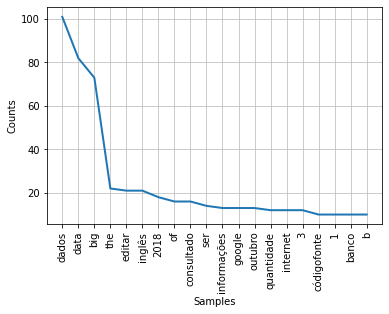

In [ ]:
# plotando frequencia de tokens
freq.plot(20, cumulative=False)

In [ ]:
#gerando um dataFrame com as frequnecias de palavras
frequencias_df = pd.DataFrame({"Tokens": freq.keys(),
                               "Frequencias":freq.values()})
frequencias_df

,Tokens,Frequencias
0,big,73
1,data,82
2,wikipédia,4
3,enciclopédia,2
4,livre,2
...,...,...
1682,gerais,1
1683,móvel,1
1684,programadores,1
1685,declaração,1


In [ ]:
#DataFrame com as maiores frequencias
maioresFrequencias = frequencias_df.nlargest(columns = "Frequencias", n=200)
maioresFrequencias

,Tokens,Frequencias
134,dados,101
1,data,82
0,big,73
1173,the,22
104,editar,21
...,...,...
407,público,3
417,objetivo,3
432,americanos,3
438,onde,3


In [ ]:
#utilizando o wordcloud para gerar uma nuvem de palavras do site
from wordcloud import WordCloud

todos_textos = ' '.join(context_without_stopwords)

print(todos_textos)

big data wikipédia enciclopédia livre saltar conteúdo alternar barra lateral busca ferramentas pessoais autenticado discussão contribuições criar conta entrar menu navegação navegação página principal conteúdo destacado eventos atuais esplanada página aleatória portais informar erro loja wikipédia colaboração boasvindas ajuda página testes portal comunitário mudanças recentes manutenção criar página páginas novas contato donativos ferramentas páginas afluentes alterações relacionadas carregar ficheiro páginas especiais hiperligação permanente informações página citar página elemento wikidata imprimirexportar criar livro descarregar pdf versão impressão noutros projetos wikimedia commons noutras línguas azrbaycanca bosanski catal etina cymraeg dansk deutsch english espaol eesti euskara suomi français hrvatski magyar bahasa indonesia íslenska italiano lietuvi latvieu nederlands norsk bokml polski român simple english slovenina srpski svenska trkçe tatarça ozbekcha ting vit editar hiperli

In [ ]:
#gerando a nuvem de palavras
nuvem_palavras = WordCloud().generate(todos_textos)

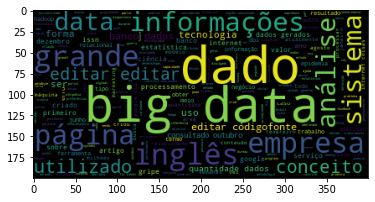

In [ ]:
#matplotlib para visualização
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.imshow(nuvem_palavras)

(-0.5, 799.5, 499.5, -0.5)

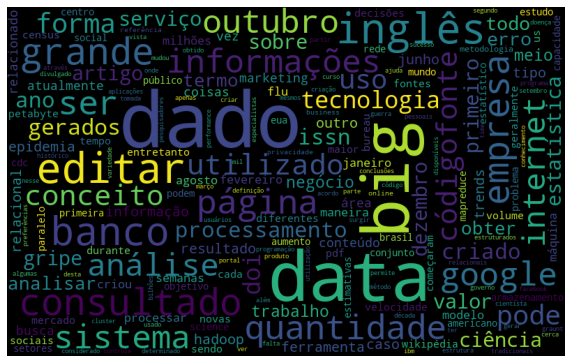

In [ ]:
#melhorando a visualização
nuvem_palavras = WordCloud(collocations=False,
                           width=800, 
                           height=500,
                           max_font_size=110).generate(todos_textos)

plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras)
plt.axis("off")